In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.optimize import minimize
import scipy.special as sp
from math import exp
import time

a = 1
b = 1
n_tup = (5, 10, 20, 50, 100)

In [36]:
def euqlid(a_e, b_e, a, b): #a_e and b_e to np arrays
    a_e = np.array(a_e)
    b_e = np.array(b_e)
    res = np.power((np.power((a_e - a), 2) + np.power((b_e - b), 2)), 0.5)
    return res

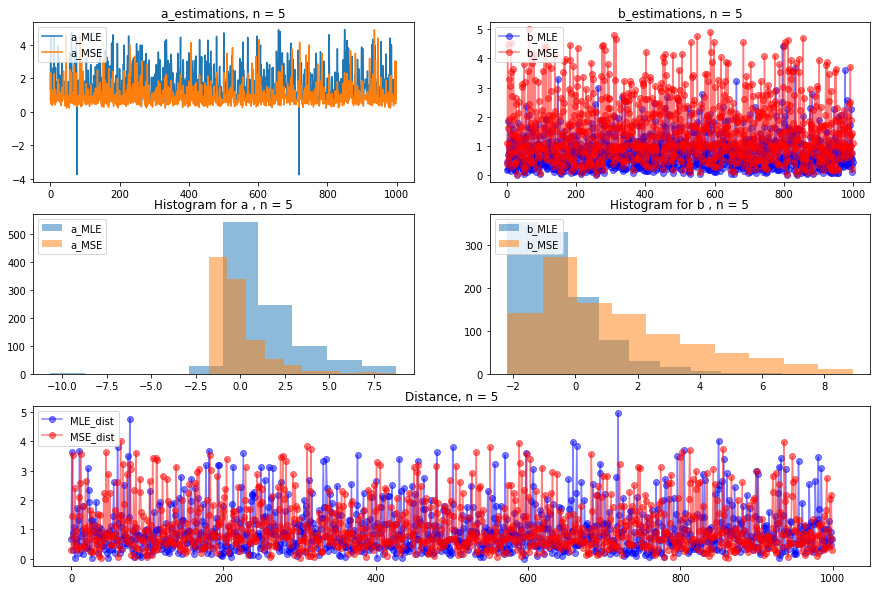

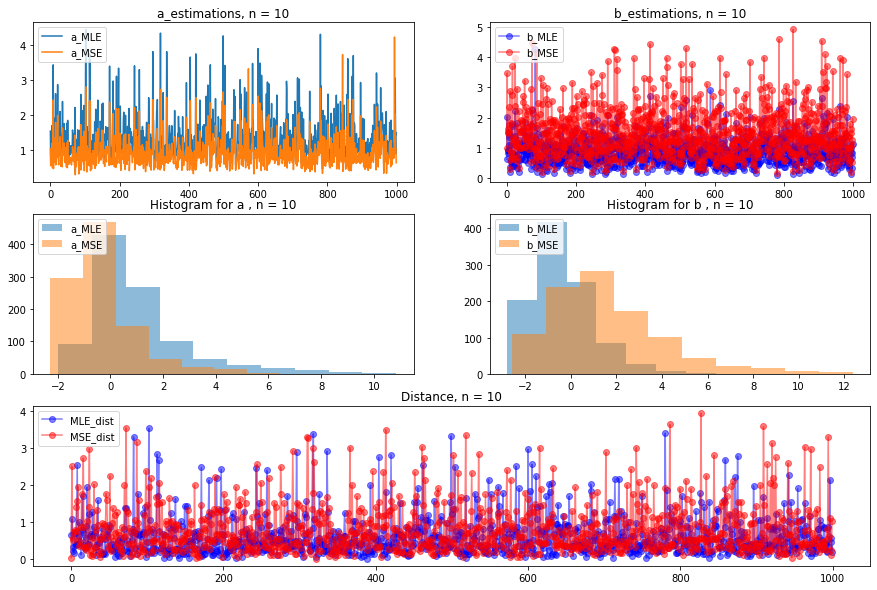

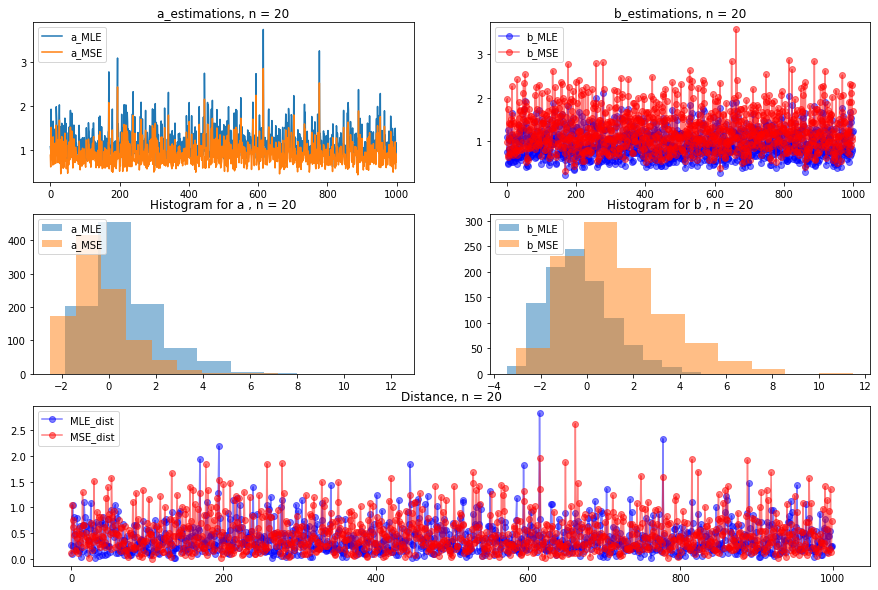

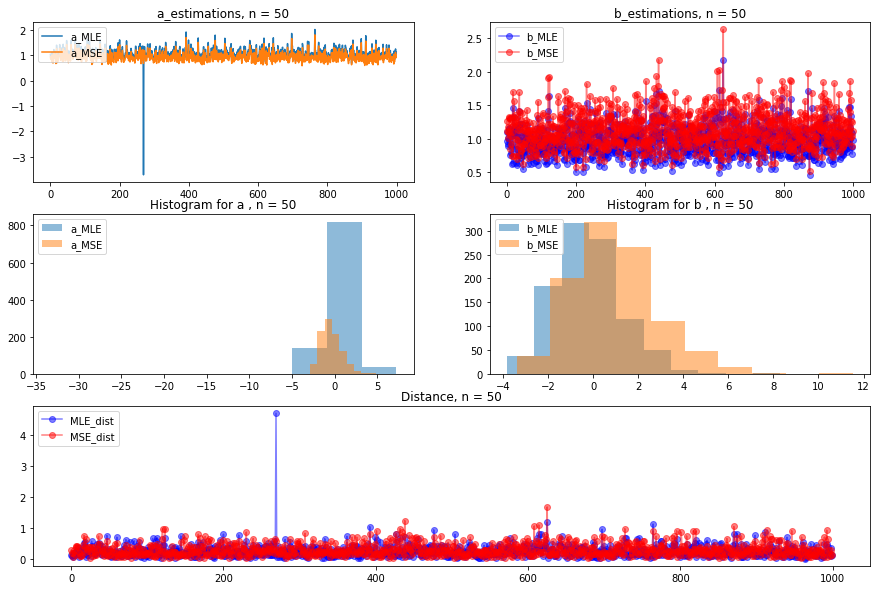

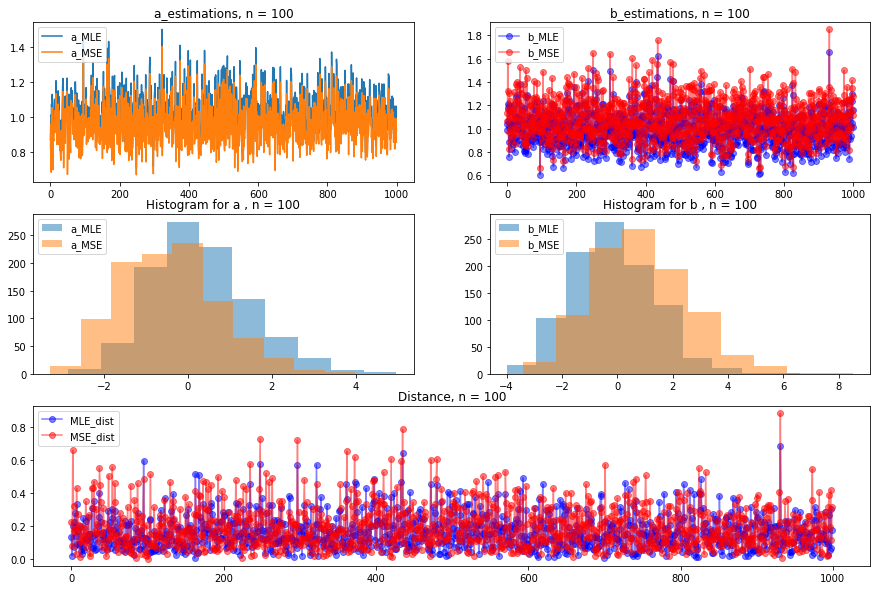

In [58]:
%%capture --no-display
#ax1 = plt.subplot(121)
#ax2 = plt.subplot(122)
# ax3 = fig.add_subplot(212)
#fig.suptitle('MLE & MSE estimations')
for n in n_tup:
    
    def mle_gamma(x, sample):
        mle = 0
        ln = 0
        s = 0
        for i in range(n):
            ln = ln + np.log(sample[i])
            s = s + sample[i]
        mle = (x[0] - 1)*ln - (s/x[1]) - x[0]*n*np.log(x[1]) - n*np.log(sp.gamma(x[0]))
        return -mle
    
    
    def mse_gamma(x, sample):
        mse = 1
        sample.sort()
        mse = mse*sp.gammainc(x[0], sample[0]/x[1])*(1- sp.gammainc(x[0], sample[n-1]/x[1]))
        for i in range(n-1):
            mse = mse*(sp.gammainc(x[0], sample[i+1]/x[1]) - sp.gammainc(x[0], sample[i]/x[1]))
        return -mse
    
    a_mle = []
    b_mle = []
    a_mse = []
    b_mse = []
    
    for i in range(1000):
        sample = sts.gamma.rvs(a, scale=b, size=n)
        x0 = (np.mean(sample)**2)/np.var(sample)
        y0 = np.var(sample)/np.mean(sample)
        res = minimize(mle_gamma, (x0, y0), sample)
        a_mle.append(res.x[0])
        b_mle.append(res.x[1])
        res = minimize(mse_gamma, (x0, y0), sample, method='Nelder-Mead')
        a_mse.append(res.x[0])
        b_mse.append(res.x[1])     
# Почистим данные от выбросов:      
    for i in range(1000):
        if abs(a_mle[i]) > 5:
            a_mle[i] = a
        if abs(a_mse[i]) > 5:
            a_mse[i] = a
        if abs(b_mle[i]) > 5:
            b_mle[i] = b
        if abs(b_mse[i]) > 5:
            b_mse[i] = b

    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    plt.plot(a_mle, label='a_MLE')
    plt.plot(a_mse, label='a_MSE')
    plt.legend(loc="upper left")
    plt.title('a_estimations, n = ' + str(n))
    
    plt.subplot(3, 2, 2)
    plt.plot(b_mle, 'bo-', label='b_MLE', alpha=0.5)
    plt.plot(b_mse, 'ro-', label='b_MSE', alpha=0.5)
    plt.legend(loc="upper left")
    plt.title('b_estimations, n = ' + str(n))
    
    plt.subplot(3, 1, 3)
    plt.plot(euqlid(a_mle, b_mle, a, b), 'bo-', label='MLE_dist', alpha=0.5)
    plt.plot(euqlid(a_mse, b_mse, a, b), 'ro-', label='MSE_dist', alpha=0.5)
    plt.legend(loc="upper left")
    plt.title('Distance, n = ' + str(n))
    
    plt.subplot(3, 2, 3)
    plt.hist((n**(0.5))*(np.array(a_mle)-a), label='a_MLE', alpha=0.5)
    plt.hist((n**(0.5))*(np.array(a_mse)-a), label='a_MSE', alpha=0.5)
    plt.legend(loc='upper left')
    plt.title('Histogram for a , n = ' + str(n))
    
    plt.subplot(3, 2, 4)
    plt.hist((n**(0.5))*(np.array(b_mle)-b), label='b_MLE', alpha=0.5)
    plt.hist((n**(0.5))*(np.array(b_mse)-b), label='b_MSE', alpha=0.5)
    plt.legend(loc='upper left')
    plt.title('Histogram for b , n = ' + str(n))
    
    plt.show()
    #    ax3.plot(weights_history)
     #   ax3.set_title('update weights')
      #  ax3.set_ylabel('value')
       # ax3.set_xlabel('itarations')

  #  time.sleep(0.3)
  #  fig.canvas.draw() 